In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/dogecoin-data/DOGE-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [4]:
#making date column as the index of the dataframe

df.Date = pd.to_datetime(df.Date,infer_datetime_format=True)
df.set_index('Date',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1598 entries, 2017-11-09 to 2022-03-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1598 non-null   float64
 1   High       1598 non-null   float64
 2   Low        1598 non-null   float64
 3   Close      1598 non-null   float64
 4   Adj Close  1598 non-null   float64
 5   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 87.4 KB


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()

Text(0.5, 1.0, 'DATE vs CLOSE')

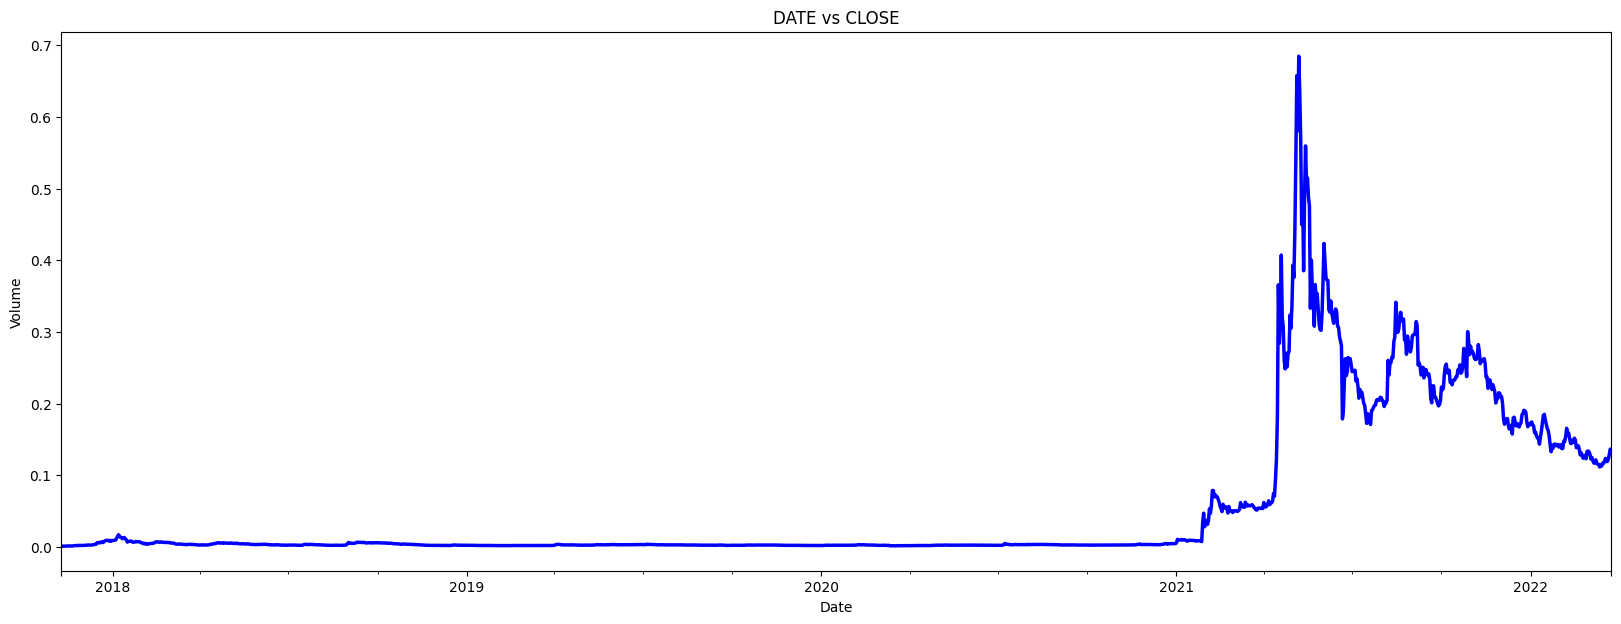

In [8]:
#Now we analyze the closing price 

plt.figure(figsize=(20,7))
x = df.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5,color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('DATE vs CLOSE')

### Feature Engineering

In [9]:
#Now make some new columns 

df['gap'] = (df['High'] - df['Low']) * df.Volume

df['y'] = df.High/df.Volume

df.head()

,Open,High,Low,Close,Adj Close,Volume,gap,y
Date,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,1464.73470,2.260546e-10
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,1299.43512,3.369818e-10
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,258.80528,5.634043e-10
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,684.10368,3.678975e-10
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,478.88511,4.884595e-10


In [10]:
df['z'] = df.Low/df.Volume

df['a'] = df.High/df.Low

df['b'] = (df.High/df.Low) * df.Volume

abs(df.corr()['Close'].sort_values(ascending=False))

df.head()

,Open,High,Low,Close,Adj Close,Volume,gap,y,z,a,b
Date,,,,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,1464.73470,2.260546e-10,1.886717e-10,1.198137,7.499800e+06
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,1299.43512,3.369818e-10,2.649228e-10,1.272000,5.401573e+06
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,258.80528,5.634043e-10,5.114115e-10,1.101665,2.457903e+06
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,684.10368,3.678975e-10,3.046556e-10,1.207585,3.971698e+06
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,478.88511,4.884595e-10,4.106768e-10,1.189401,2.951226e+06


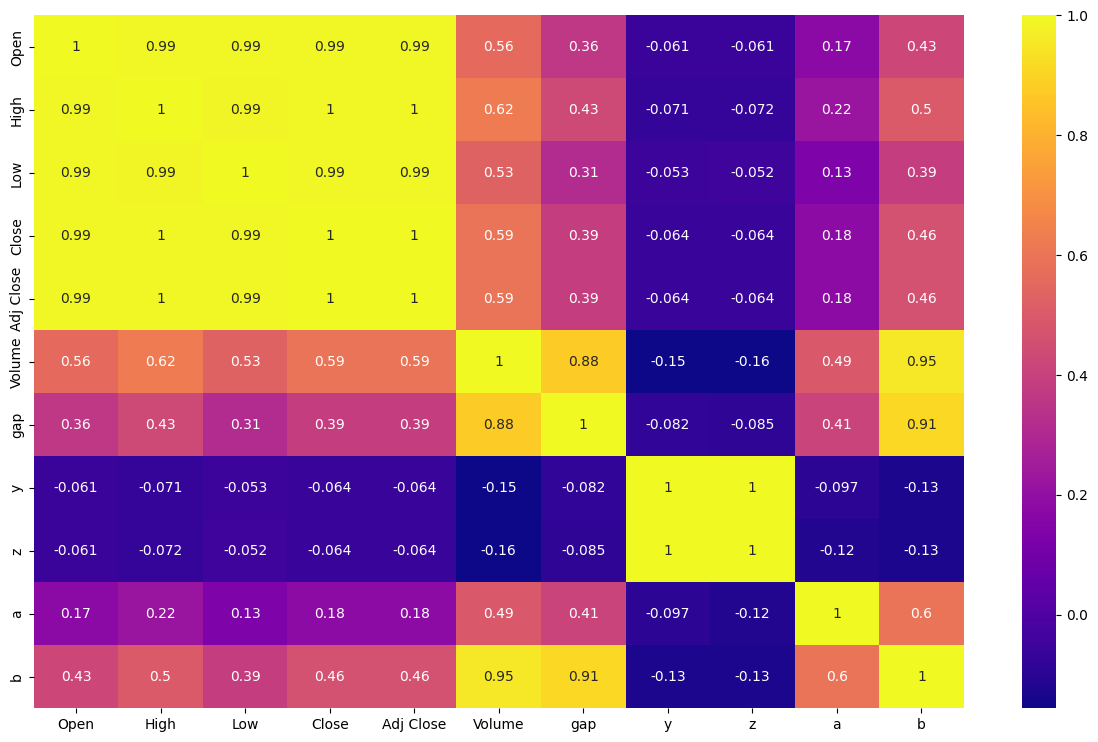

In [12]:
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

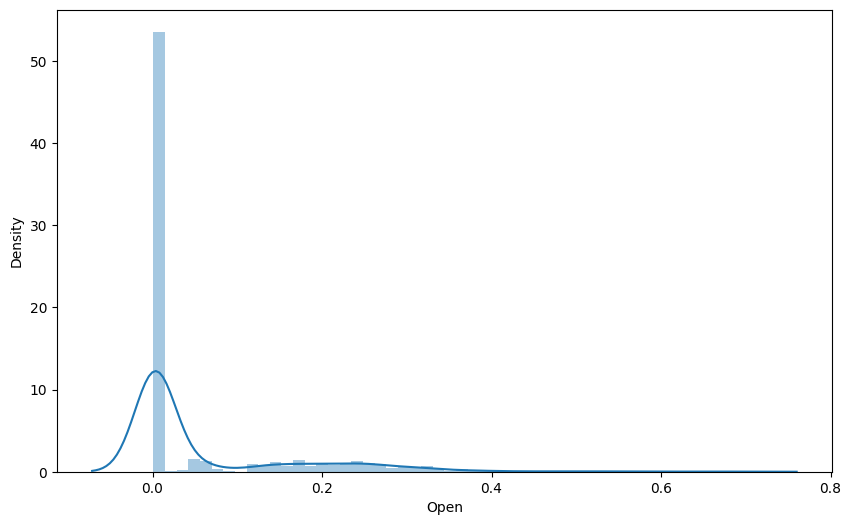

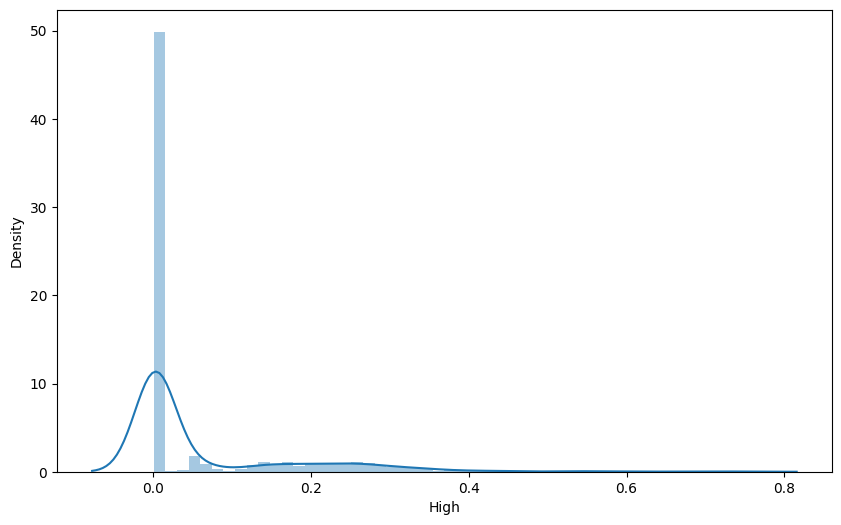

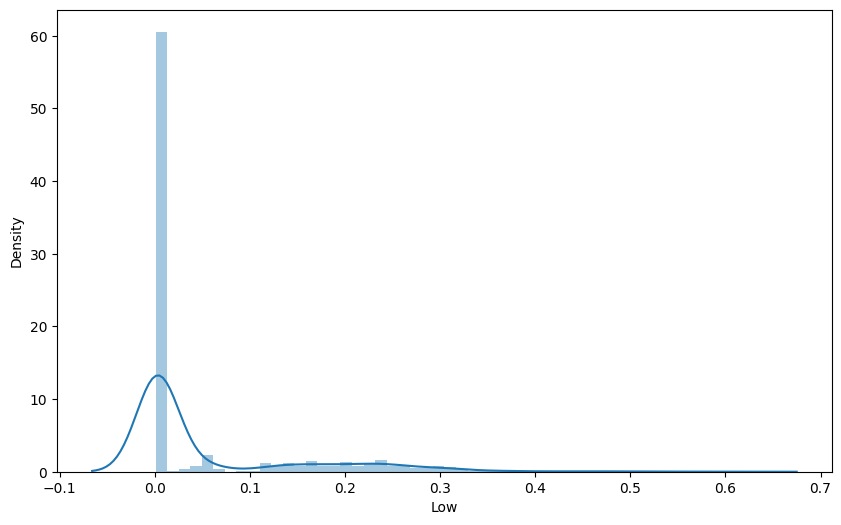

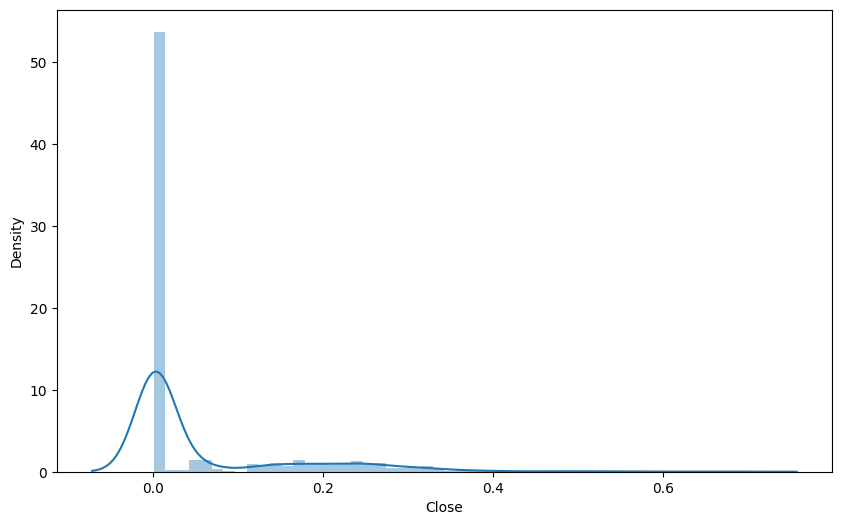

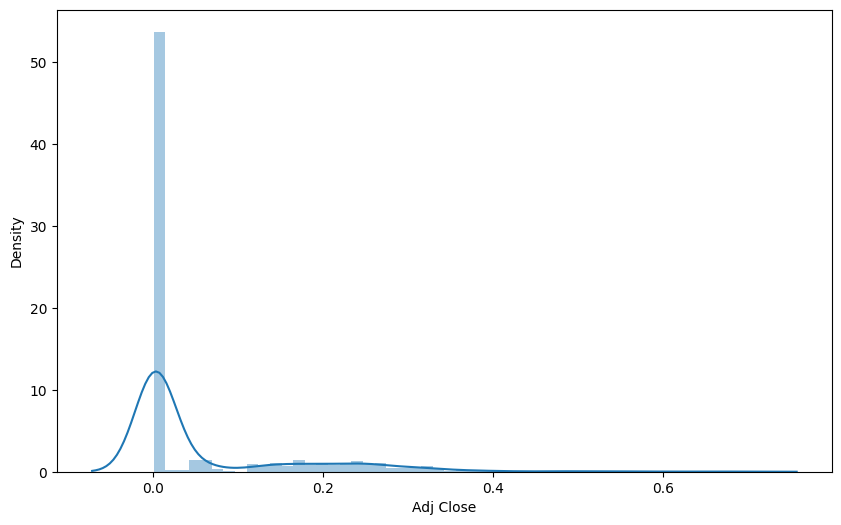

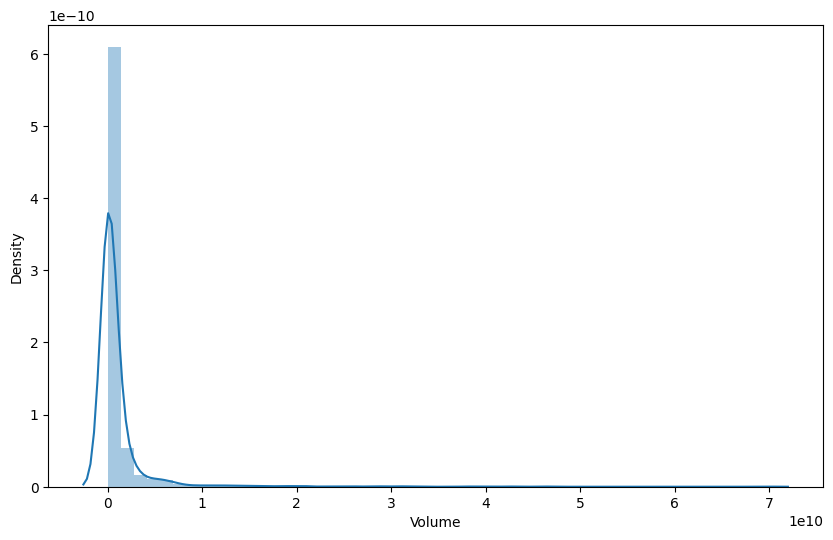

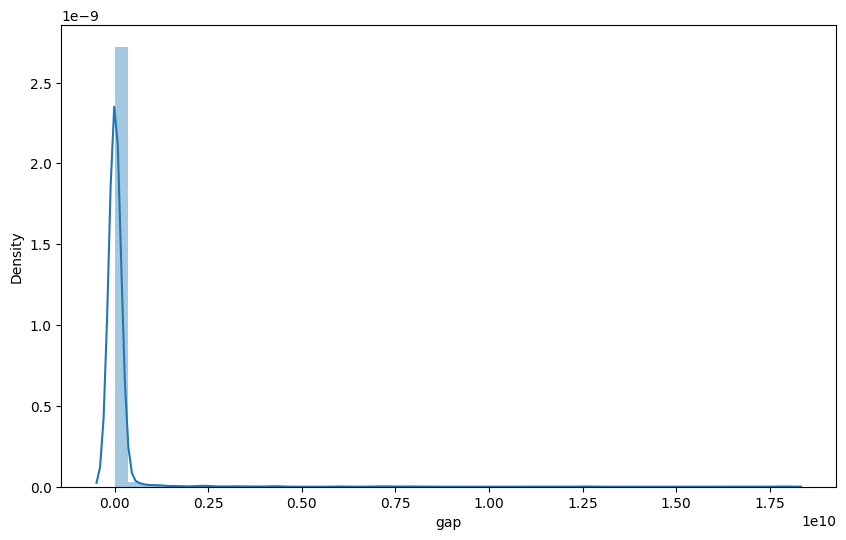

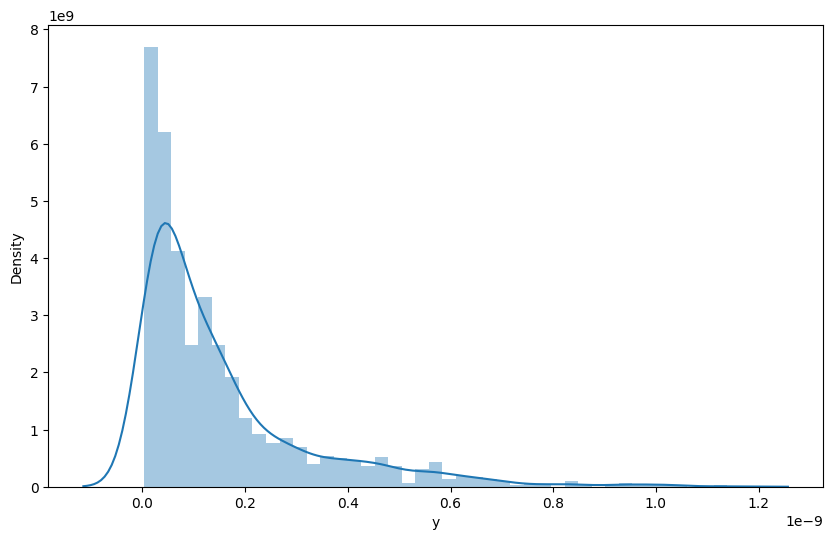

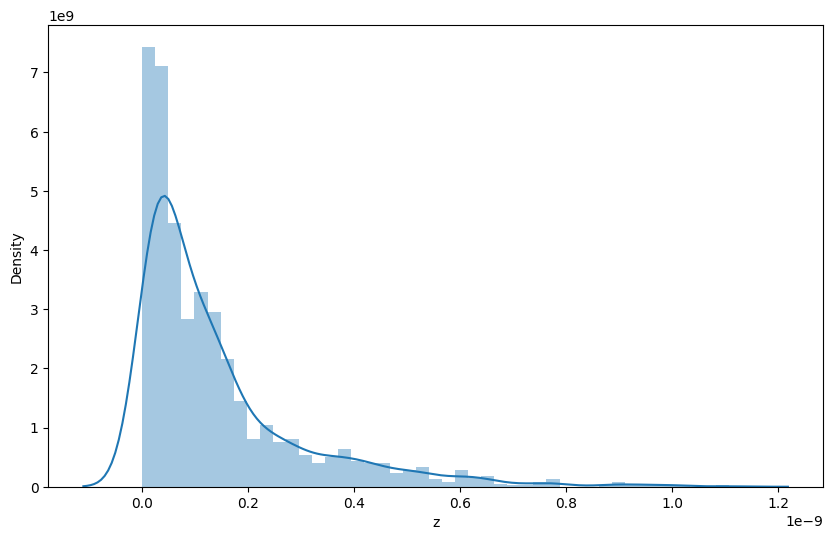

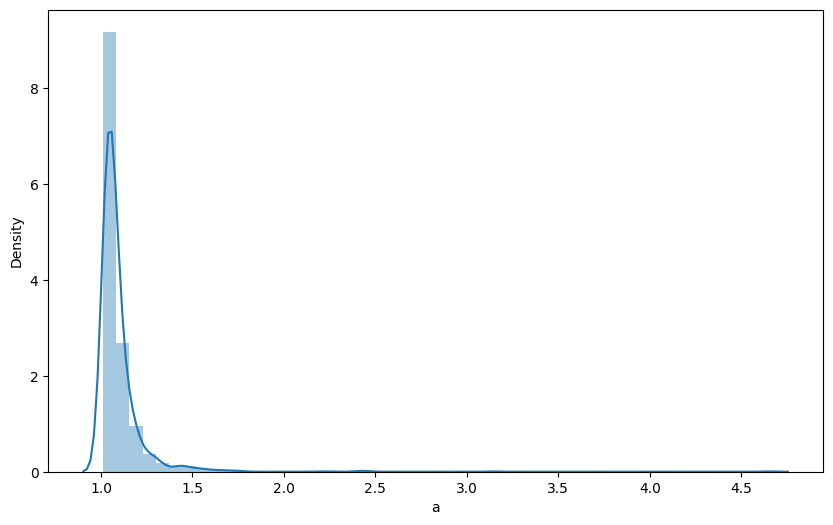

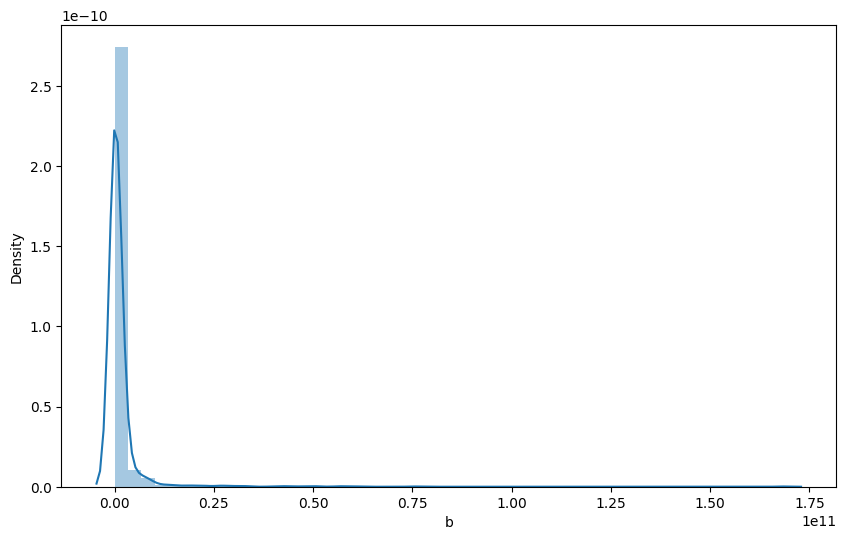

In [13]:

#check dist of all columns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()


In [14]:
#NOW we will use ARIMA model for time series analysis

df = df.tail(30)

train = df[:11]
test = df[-19:]

print(train.shape,test.shape)



(11, 11) (19, 11)


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')


model = SARIMAX(endog=train['Close'],exog=train.drop('Close',axis=1),order=(2,1,1))
results = model.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.66781D+00    |proj g|=  1.66265D+22

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      1     21      1     0     0   1.663D+22  -8.668D+00
  F =  -8.6678057057274671     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [23]:
#Now lets see the predictions
start = 11
end = 29

preds = results.predict(start=start,end=end,exog=test.drop('Close',axis=1))
preds

2022-03-07    0.117105
2022-03-08    0.117029
2022-03-09    0.121588
2022-03-10    0.116885
2022-03-11    0.115602
2022-03-12    0.115136
2022-03-13    0.111608
2022-03-14    0.114048
2022-03-15    0.112784
2022-03-16    0.116908
2022-03-17    0.116502
2022-03-18    0.119306
2022-03-19    0.123569
2022-03-20    0.119154
2022-03-21    0.119339
2022-03-22    0.122481
2022-03-23    0.129727
2022-03-24    0.136550
2022-03-25    0.132080
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

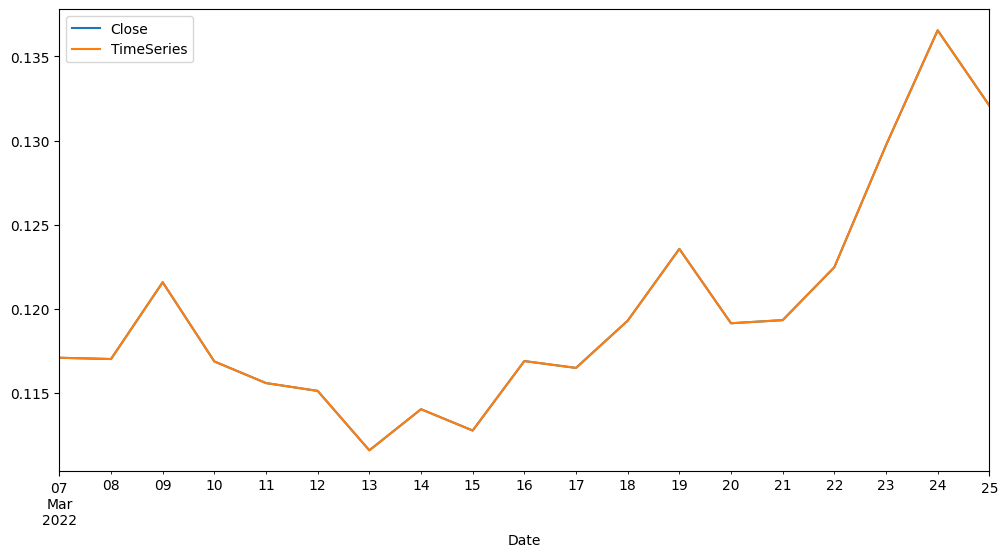

In [24]:
#Now lets plot the predictions for better visualization

test.Close.plot(legend=True,figsize=(12,6))
preds.plot(label='TimeSeries',legend=True)